In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import display


### Decision Tree 

In [2]:
df = pd.read_csv('diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### Feature selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

feature_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Feature_Scores']) 
display(feature_scores.sort_values(by='Feature_Scores', ascending=False))

selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)


,Feature_Scores
Glucose,213.161752
BMI,71.772072
Age,46.140611
Pregnancies,39.670227
DiabetesPedigreeFunction,23.871300
Insulin,13.281108
SkinThickness,4.304381
BloodPressure,3.256950


Selected features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [4]:
# drop the SkinThickness column from df dataframe 
df = df.drop('SkinThickness', axis=1)

# saperate dependent and independent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy Score:, 79.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



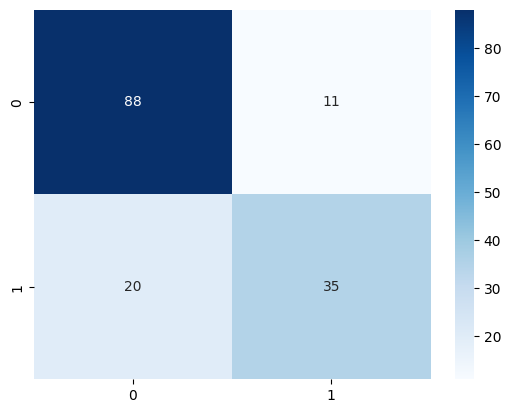

In [13]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, y_train)

# Predicting the decision tree
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score:, {round((accuracy* 100),2)}%')
print('Classification Report:\n', classification_report(y_test, y_pred))
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# show confusion matrix in graph
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

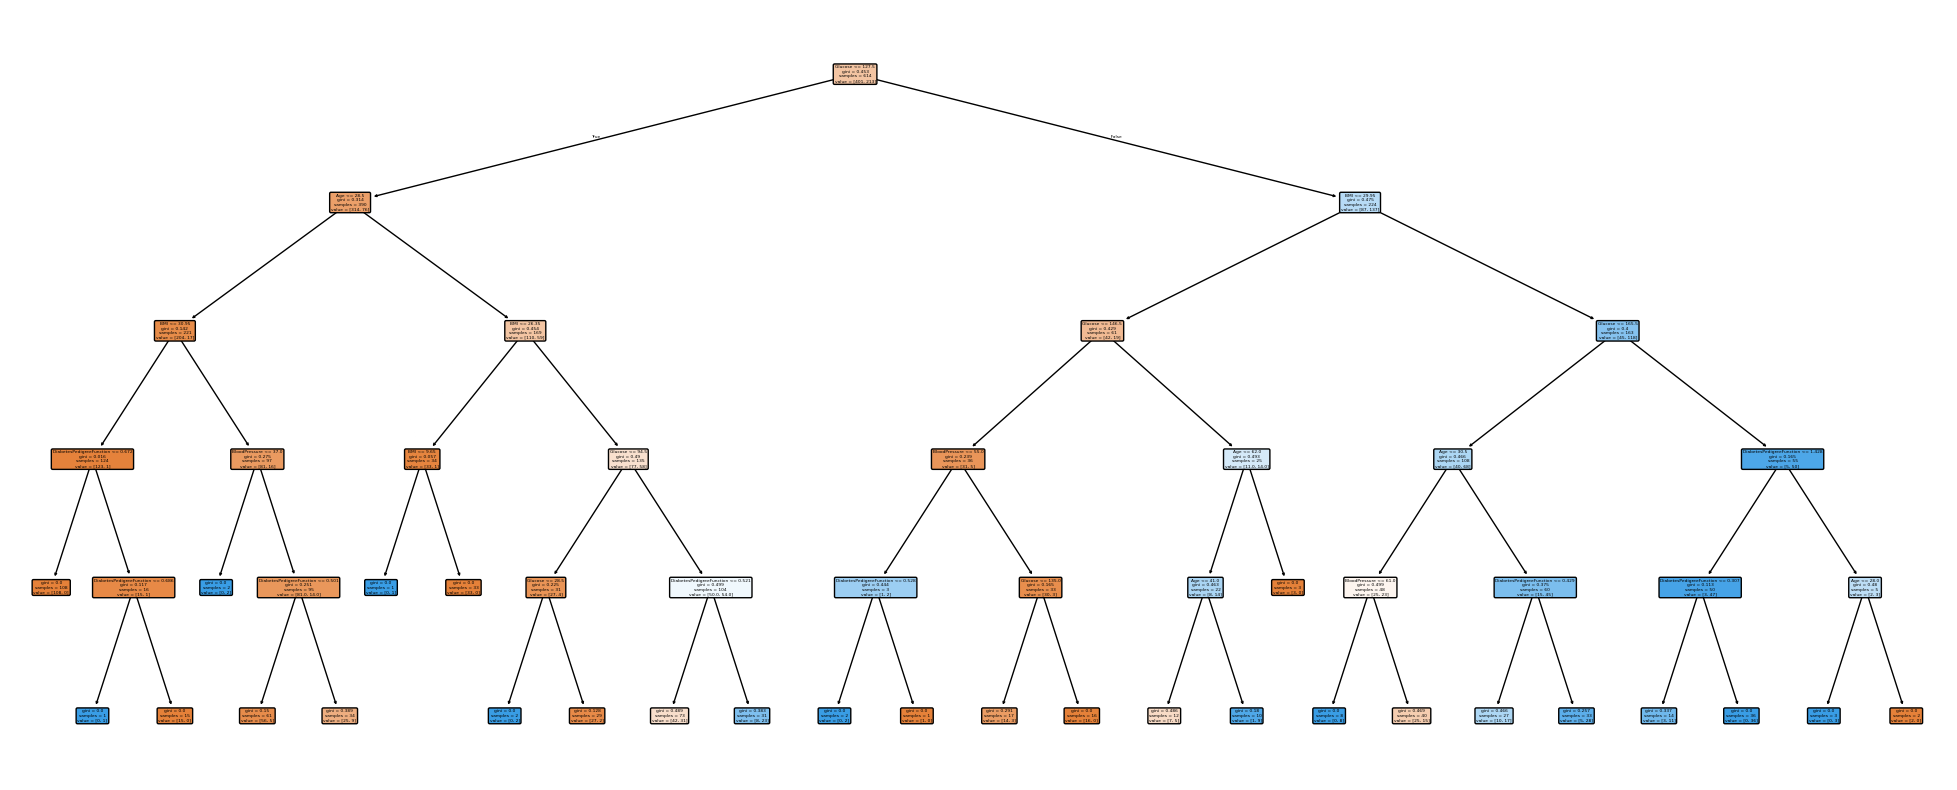

In [15]:
# tree map for the model (sklerarn tree and matplotlib)
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

